# Statistik Raport
---

### Vi ska i raporten undersöka om mängden hästkrafter i amerikanska bilar skiljer sig från de europeisk bilarna.

**Vi börjar med att räkna ut medel mängden för hästkrafter för amerikanska och europeiska bilar.**

**Deta gör vi igenom att först dela upp datasetet i amerikanska och europeiska bilar.**

**och sen med hjälp av numpy räkna ut medlvärdet av varje typ.**

In [18]:
# importera dependences 
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import seaborn as sns

# filepath
file_path = "../Datasets/cars.csv"

# hämta datasetet.
df_cars = pd.read_csv(file_path)

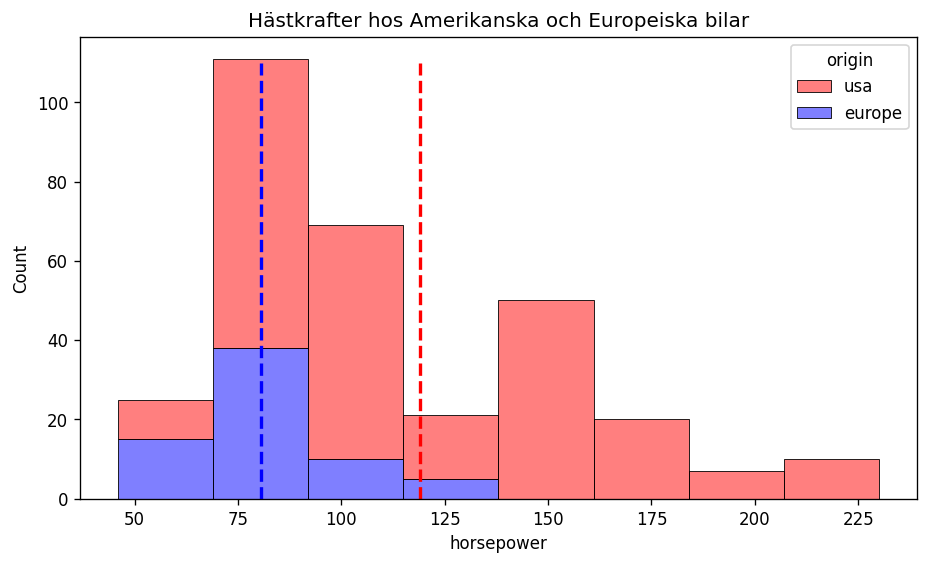

Mean: USA: 119.05, EU: 80.56


In [19]:
# sorterar datan på vart bilarna kommer ifrån.
to_drop = df_cars[df_cars["origin"] == "japan"].index
df_cars.drop(to_drop, inplace= True)

# dropar alla nan values från dataframen
df_cars.dropna(inplace= True)

# beräkna mu för eu och usa.
mu_usa = np.mean(df_cars[df_cars["origin"] == "usa"]["horsepower"])
mu_eu = np.mean(df_cars[df_cars["origin"] == "europe"]["horsepower"])

# skapar en subplot
fig, ax = plt.subplots(1, 1, figsize=(9, 5), dpi=120)

# plotar horsepower för Usa och Europe. (röd och blå)
sns.histplot(data=df_cars, x="horsepower", hue="origin", bins= 8, linewidth= 0.5, multiple="stack", palette=["red", "blue"], alpha=0.5)
plt.plot([mu_usa, mu_usa], [0, 110], color='red', linestyle='--', linewidth=2, label='Medelvärde') #plotar medelvärdet för usa.
plt.plot([mu_eu, mu_eu], [0, 110], color='blue', linestyle='--', linewidth=2, label='Medelvärde') # plotar medelvärdet för eu.

# titlen för ploten
ax.set_title("Hästkrafter hos Amerikanska och Europeiska bilar")
plt.show()
 
# skriver ut medlvärdena för eu och usa.
print(f"Mean: USA: {round(mu_usa, 2)}, EU: {round(mu_eu, 2)}")

#### Som man kan se från tabelen åvan kan man lätt se att medelvärdet för amerikanska bilar är ganska mycket stören en de europeiska bilarna.
---
**mean: USA: 119.05, EU: 80.56** 

---
**Vi skulle kunna testa så att deta verkligen stämmer igenom att göra ett hypotestest för att verkligen kontrollera att detta stämmer.**

**Men för att kunna göt hypotestestet måste vå först börja med att gör ett f-test för att se villka inställningar vi ska ha på hypotestestet.**

In [20]:
from scipy.stats import f

# kalkylera F igenom att ta var av usa och eu cars och dela dem på varandra.
F = np.var(df_cars[df_cars["origin"] == "usa"]["horsepower"]) / np.var(df_cars[df_cars["origin"] == "europe"]["horsepower"])

# kalkylera df1 och df1 igenom n - 1
df1 = len(df_cars[df_cars["origin"] == "usa"]) - 1
df2 = len(df_cars[df_cars["origin"] == "europe"]) - 1

# alpha value (significance)
a = 0.05

# kalkylera p_value med F-test
p_value = f.cdf(F, df1, df2)

# printar slutsats.
print(f"P-value: {round(p_value, 2)}, P-value > alpha = {p_value > a}")

P-value: 1.0, P-value > alpha = True


In [22]:
from scipy.stats import ttest_ind

result = ttest_ind(a=df_cars[df_cars["origin"] == "usa"]["horsepower"], b=df_cars[df_cars["origin"] == "europe"]["horsepower"], equal_var=True, alternative='two-sided')
print(result)

Ttest_indResult(statistic=7.681404142807087, pvalue=2.0653368475960042e-13)


#### Som vi kan se från resultatet av hypotestestet kan vi se att p-value är mycket mindre en a = 0.05. 
**Deta innebär att det är en stor skillnade på de olika mägdena hästkrafter mellan eu och usa bilar**
**deta betydr även att den förata grafen är korrekt**

---

### Det som skulle vara intressant nu är att ta reda på hur stor skillnaden på hästkrafterna är mellan USA och EU.

**Deta gör vi igenom att dra ett...**

<AxesSubplot: >

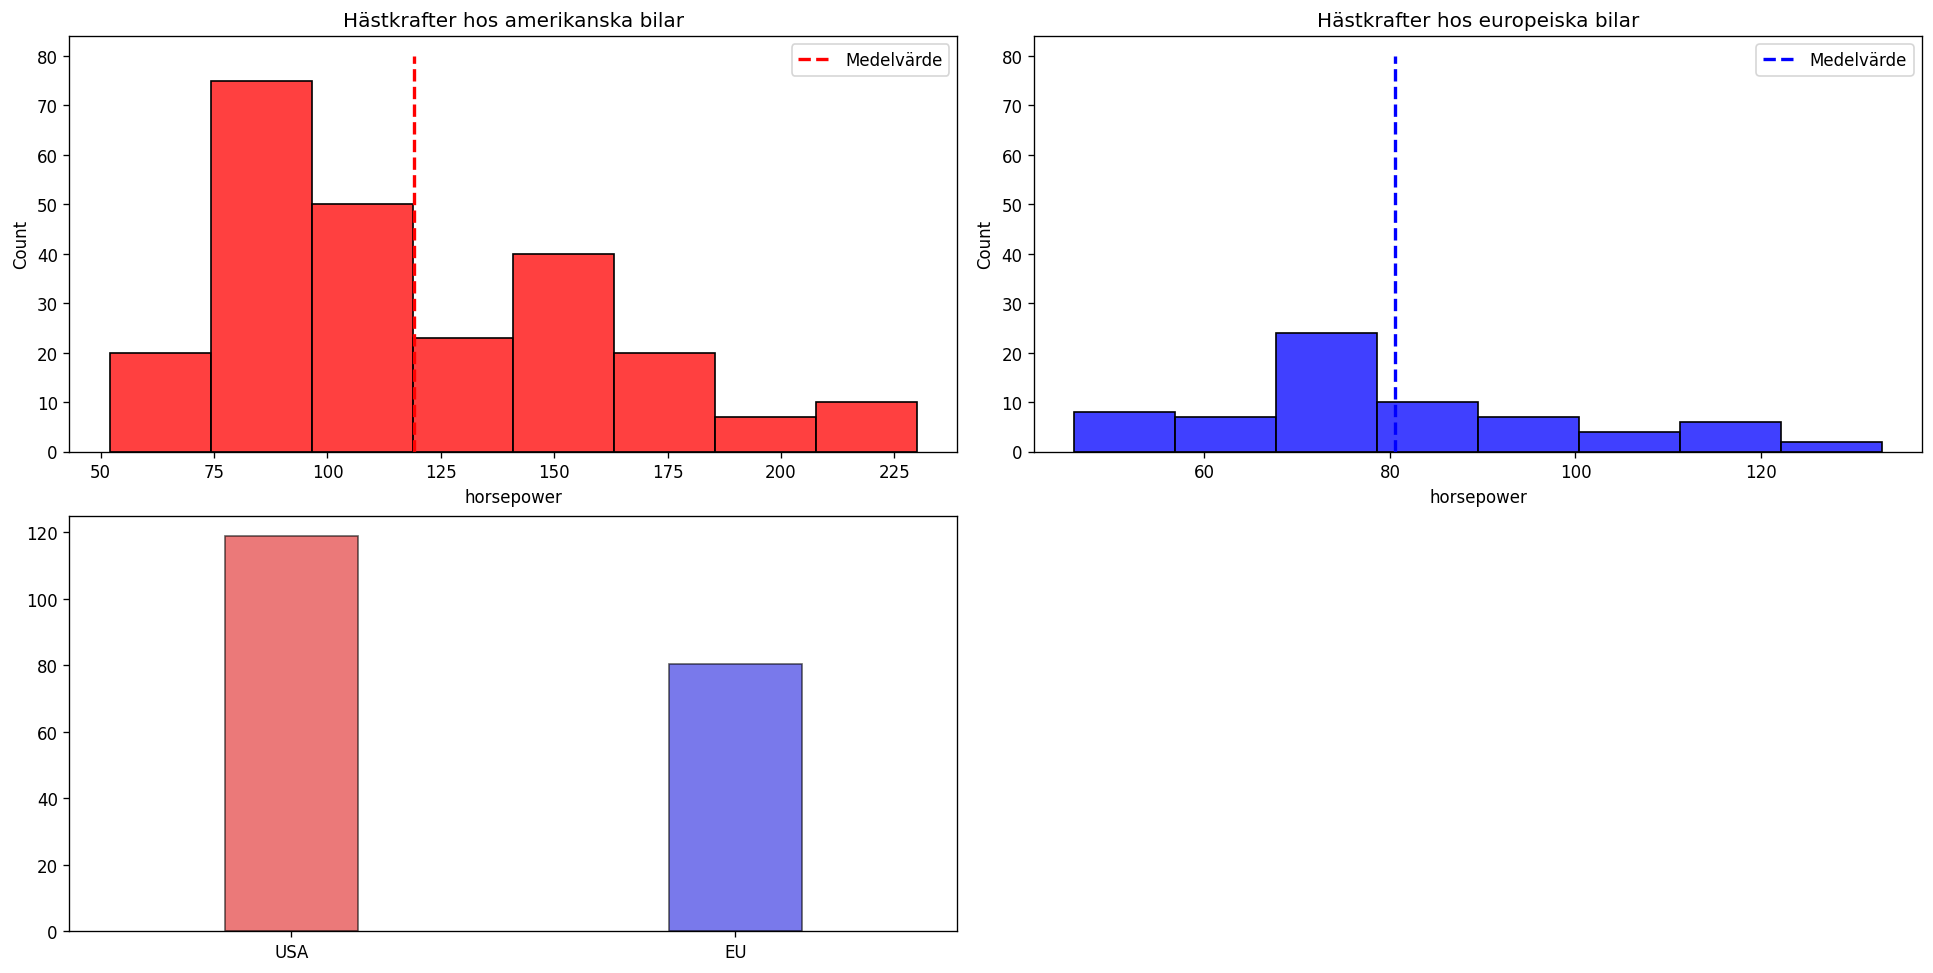

In [5]:
mu_data = {"x": ["USA", "EU"], "y": [mu_usa, mu_eu]}

# skapar subplots för att bygga ett grid.
fig = plt.figure(figsize=(16, 8), dpi=120, constrained_layout = True)
spec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[0, 1])
ax2 = fig.add_subplot(spec[1, 0])

sns.histplot(data=df_cars[df_cars["origin"] == "usa"], x="horsepower", bins=8, ax=ax0, multiple="dodge", color="red")
ax0.plot([mu_usa, mu_usa], [0, 80], color='red', linestyle='--', linewidth=2, label='Medelvärde')
ax0.set_title("Hästkrafter hos amerikanska bilar")
ax0.legend(loc='upper right')

sns.histplot(data=df_cars[df_cars["origin"] == "europe"], x="horsepower", bins=8, ax=ax1, color="blue")
ax1.plot([mu_eu, mu_eu], [0, 80], color='blue', linestyle='--', linewidth=2, label='Medelvärde')
ax1.set_title("Hästkrafter hos europeiska bilar")
ax1.legend(loc='upper right')

sns.barplot(data=mu_data, x="x", y="y", ax=ax2, width=0.3, palette=["red", "blue"], edgecolor="black", alpha=0.6)